In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.preprocessing import OneHotEncoder

# Exploratory Data Analysis

In [2]:
# Load the dataset
used_cars_data = pd.read_csv('data/used_cars_UK.csv')

# Display the first few rows of the dataframe
used_cars_data.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [3]:
# Check the info of the dataset
print(used_cars_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3685 non-null   int64  
 1   title              3685 non-null   object 
 2   Price              3685 non-null   int64  
 3   Mileage(miles)     3685 non-null   int64  
 4   Registration_Year  3685 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3685 non-null   object 
 7   Body type          3685 non-null   object 
 8   Engine             3640 non-null   object 
 9   Gearbox            3685 non-null   object 
 10  Doors              3660 non-null   float64
 11  Seats              3650 non-null   float64
 12  Emission Class     3598 non-null   object 
 13  Service history    540 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 403.2+ KB
None


In [4]:
# Check for missing values
used_cars_data.isnull().sum()

Unnamed: 0              0
title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64

In [5]:
# Get descriptive statistics
print(used_cars_data.describe())

        Unnamed: 0         Price  Mileage(miles)  Registration_Year  \
count  3685.000000   3685.000000    3.685000e+03        3685.000000   
mean   2314.770963   5787.145726    8.132816e+04        2011.835007   
std    1415.821308   4480.810572    3.942083e+04           5.092566   
min       0.000000    400.000000    1.000000e+00        1953.000000   
25%    1059.000000   2490.000000    5.698400e+04        2008.000000   
50%    2279.000000   4000.000000    8.000000e+04        2012.000000   
75%    3593.000000   7995.000000    1.030000e+05        2015.000000   
max    4727.000000  33900.000000    1.110100e+06        2023.000000   

       Previous Owners        Doors        Seats  
count      2276.000000  3660.000000  3650.000000  
mean          2.807557     4.321038     4.900274  
std           1.546028     0.986902     0.577200  
min           1.000000     2.000000     2.000000  
25%           2.000000     3.000000     5.000000  
50%           3.000000     5.000000     5.000000  
75%

In [6]:
categorical_columns = used_cars_data.select_dtypes(include=['object']).columns

categorical_columns

Index(['title', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Emission Class', 'Service history'],
      dtype='object')

In [7]:
unique_values = used_cars_data[categorical_columns].nunique()

unique_values

title              469
Fuel type            6
Body type           10
Engine              34
Gearbox              2
Emission Class       6
Service history      1
dtype: int64

In [8]:
category_frequencies = {column: used_cars_data[column].value_counts() for column in categorical_columns}

category_frequencies

{'title': Vauxhall Corsa         223
 Ford Focus             162
 Vauxhall Astra         155
 Ford Fiesta            128
 BMW 3 Series           109
                       ... 
 DS Automobiles DS 9      1
 Lexus SC 430             1
 Mazda MX-30              1
 Mercedes-Benz CL         1
 Honda Prelude            1
 Name: title, Length: 469, dtype: int64,
 'Fuel type': Petrol                   2361
 Diesel                   1218
 Petrol Hybrid              47
 Electric                   31
 Petrol Plug-in Hybrid      27
 Diesel Hybrid               1
 Name: Fuel type, dtype: int64,
 'Body type': Hatchback      2279
 SUV             460
 Saloon          368
 Estate          171
 MPV             153
 Coupe           139
 Convertible     109
 Pickup            3
 Combi Van         2
 Minibus           1
 Name: Body type, dtype: int64,
 'Engine': 1.6L    734
 2.0L    553
 1.2L    521
 1.4L    421
 1.0L    326
 1.5L    294
 1.3L    170
 1.8L    158
 3.0L     79
 2.2L     75
 2.1L     63
 1.

In [9]:
# Calculate the correlation matrix for numerical features
correlation_matrix = used_cars_data.corr()
correlation_matrix

/var/folders/kk/r29wd8kj56g0l6y20z21b1680000gn/T/ipykernel_80095/3007023166.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = used_cars_data.corr()


,Unnamed: 0,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
Unnamed: 0,1.000000,0.232056,-0.130364,0.219205,-0.180317,0.049768,0.023674
Price,0.232056,1.000000,-0.500158,0.723880,-0.479424,0.113352,-0.027406
Mileage(miles),-0.130364,-0.500158,1.000000,-0.417029,0.316160,-0.037042,0.095287
Registration_Year,0.219205,0.723880,-0.417029,1.000000,-0.501045,0.217475,0.037120
Previous Owners,-0.180317,-0.479424,0.316160,-0.501045,1.000000,-0.153262,-0.029338
Doors,0.049768,0.113352,-0.037042,0.217475,-0.153262,1.000000,0.497163
Seats,0.023674,-0.027406,0.095287,0.037120,-0.029338,0.497163,1.000000


/var/folders/kk/r29wd8kj56g0l6y20z21b1680000gn/T/ipykernel_80095/1459340651.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = used_cars_data.drop(['Unnamed: 0'], axis=1).corr()


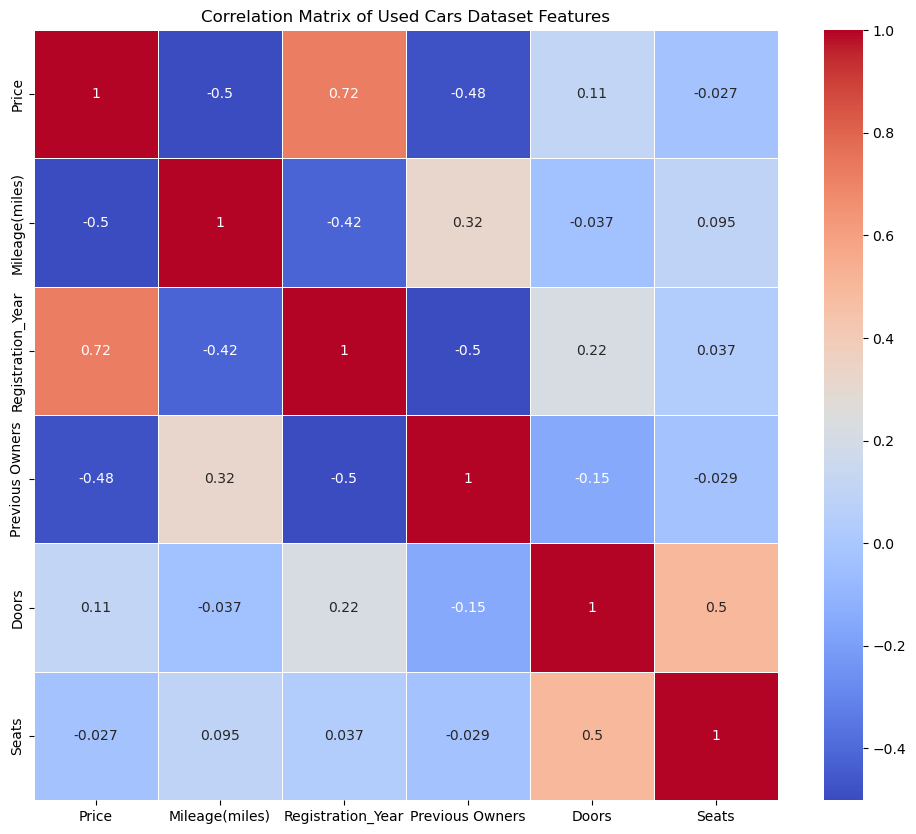

In [10]:
# Generate a correlation matrix for the numerical features, excluding the 'Unnamed: 0' column
correlation_matrix = used_cars_data.drop(['Unnamed: 0'], axis=1).corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Used Cars Dataset Features')
plt.show()

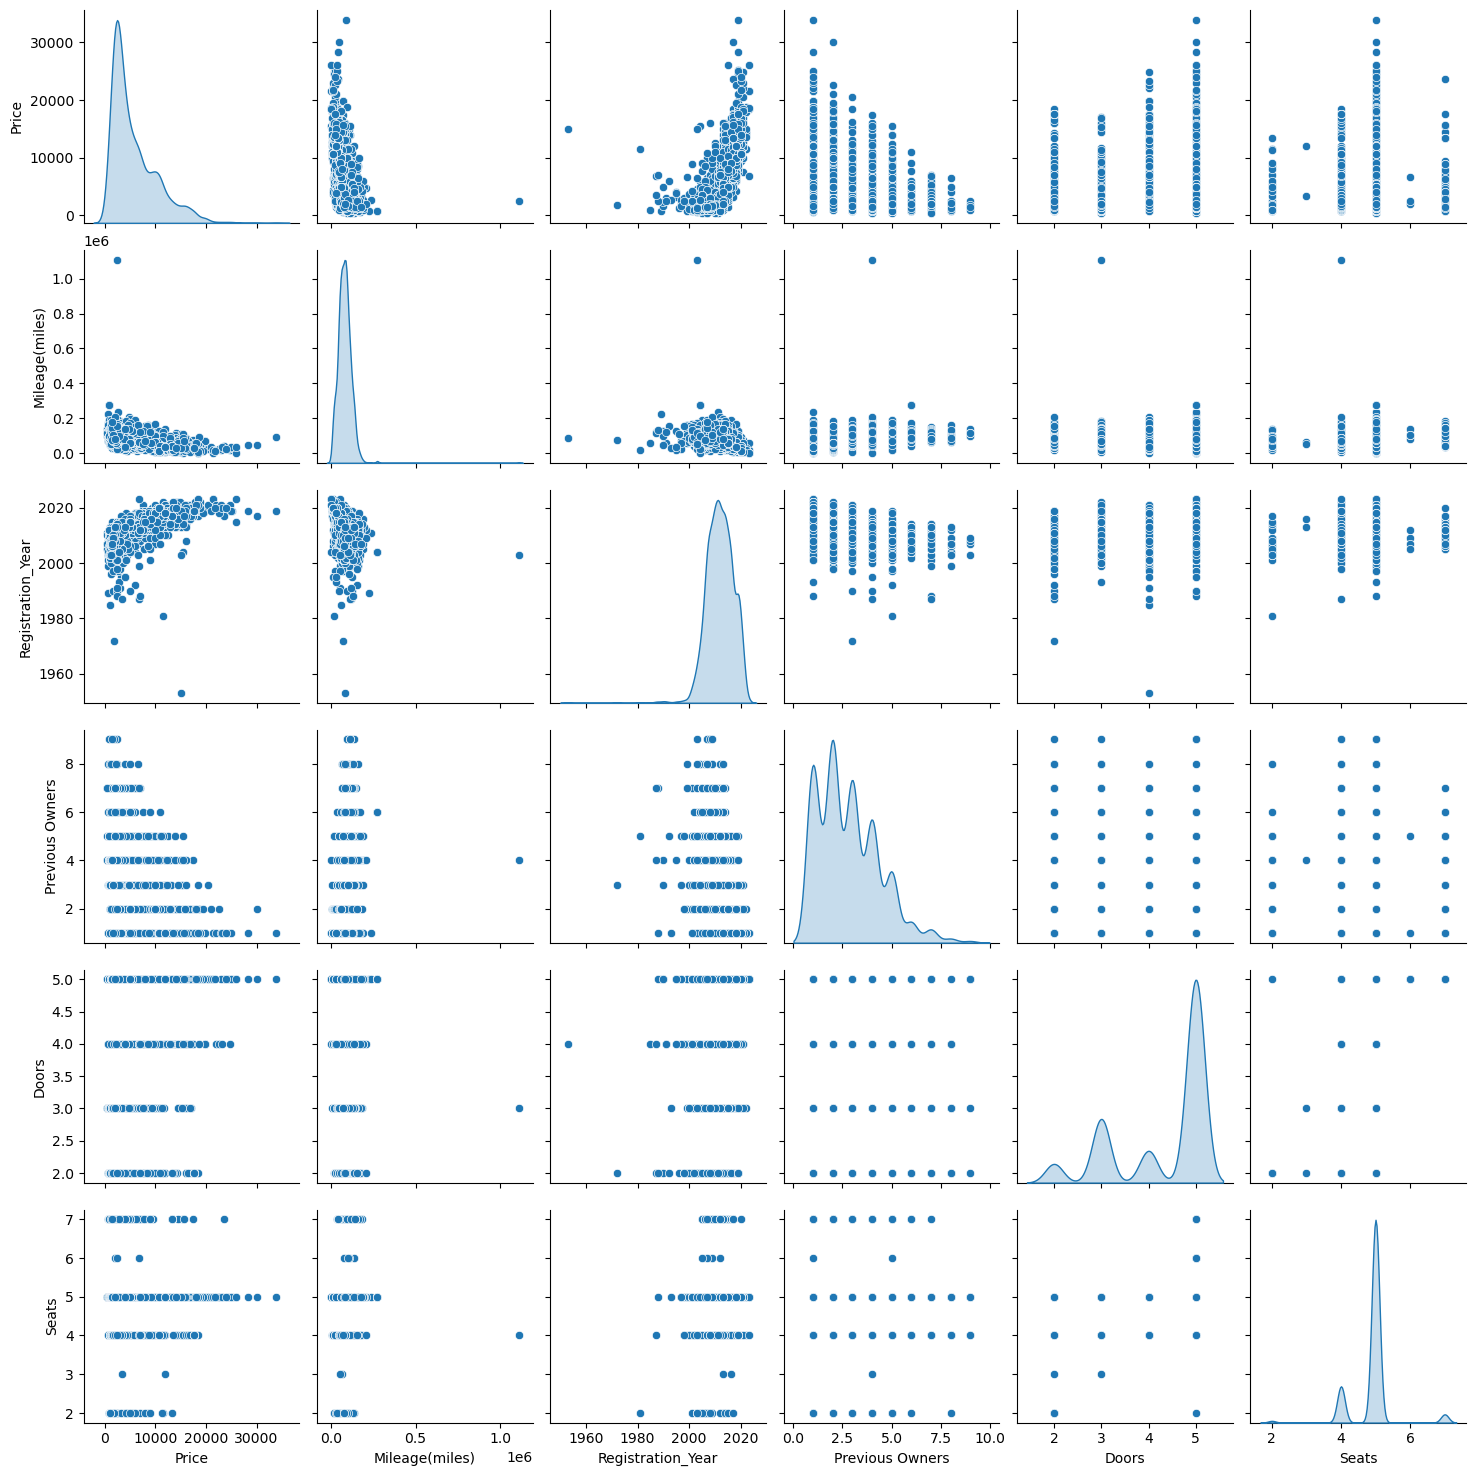

In [11]:
# Plot a pairplot for numerical features, excluding the 'Unnamed: 0' column
sns.pairplot(used_cars_data.drop(['Unnamed: 0'], axis=1).select_dtypes(include=[np.number]), diag_kind='kde')

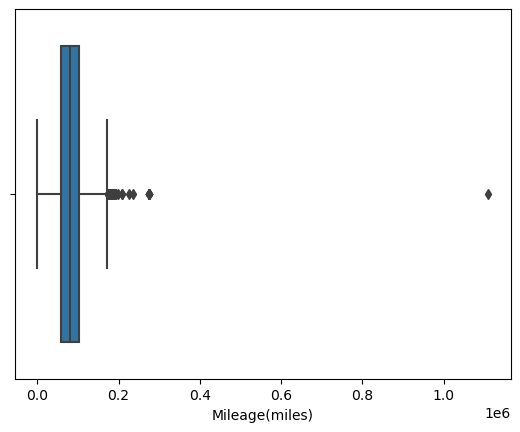

In [12]:
# Boxplot for mileage
sns.boxplot(x=used_cars_data['Mileage(miles)'])
plt.show()

# EDA Conclusions

1. **Missing values:** There's a considerable number of missing values in the dataset, namely in the 'Previous Owners' field and the 'Service History', both of which are crucial features when looking for a used car. We'll have to adequately tackle these features in the next step
2. **Correlation Analysis:** We see some relationships which are to be expected (price and mileage or price and registration year). In general, there are no extreme correlations (neither positive nor negative) in the dataset.
3. **Pairplot & Boxplot:** The pairplot lets us see the relationships between numerical features and easily detect some outliers. Such is the case with mileage, which shows a car with over one million miles, suggesting a data error rather than an actual value. We may also need some data transformation before modelling.

---------------------------

# Data preprocessing

In [29]:
used_cars_data['Brand'] = used_cars_data['title'].apply(lambda x: x.split()[0])
used_cars_data['Brand'].unique()

array(['SKODA', 'Vauxhall', 'Hyundai', 'MINI', 'Ford', 'Volvo', 'Peugeot',
       'BMW', 'Citroen', 'Mercedes-Benz', 'Mazda', 'Saab', 'Volkswagen',
       'Honda', 'MG', 'Toyota', 'SEAT', 'Nissan', 'Alfa', 'Renault',
       'KIA', 'Proton', 'Fiat', 'Audi', 'Mitsubishi', 'Lexus', 'Land',
       'Chevrolet', 'Suzuki', 'Dacia', 'Daihatsu', 'Jeep', 'Jaguar',
       'Chrysler', 'Rover', 'DS', 'Daewoo', 'Dodge', 'Porsche', 'Subaru',
       'Infiniti', 'Abarth', 'Smart', 'Marcos', 'Maserati', 'Ssangyong',
       'Lagonda', 'Isuzu'], dtype=object)

In [13]:
# Drop the 'Service history' column due to high number of missing values
used_cars_data_cleaned = used_cars_data.drop(columns=['Unnamed: 0','Service history', 'title'])

# Calculate medians for 'Previous Owners', 'Doors', 'Seats', 'Emission Class', and 'Engine'
previous_owners_median = used_cars_data_cleaned['Previous Owners'].median()
doors_median = used_cars_data_cleaned['Doors'].median()
seats_median = used_cars_data_cleaned['Seats'].median()

# Remove 'Euro' prefix from 'Emission Class', convert to numeric
used_cars_data_cleaned['Emission Class'] = (
    used_cars_data_cleaned['Emission Class']
    .str.replace('Euro ', '')
    .astype(float, errors='raise')
)

# Calculate median for 'Emission Class' and impute missing values
emission_class_median = used_cars_data_cleaned['Emission Class'].median()
used_cars_data_cleaned['Emission Class'].fillna(emission_class_median, inplace=True)

# Remove 'L' suffix from 'Engine', convert to numeric
used_cars_data_cleaned['Engine'] = (
    used_cars_data_cleaned['Engine']
    .str.replace('L', '')
    .astype(float, errors='raise')
)

# Calculate median for 'Engine' and impute missing values
engine_median = used_cars_data_cleaned['Engine'].median()
used_cars_data_cleaned['Engine'].fillna(engine_median, inplace=True)

# Impute missing values for 'Previous Owners', 'Doors', and 'Seats' with their respective medians
used_cars_data_cleaned['Previous Owners'].fillna(previous_owners_median, inplace=True)
used_cars_data_cleaned['Doors'].fillna(doors_median, inplace=True)
used_cars_data_cleaned['Seats'].fillna(seats_median, inplace=True)

In [14]:
used_cars_data_cleaned.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class
0,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0
1,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0
2,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0
3,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0
4,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0


In [15]:
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder on the categorical columns of the training data
categorical_columns = ['Fuel type', 'Body type', 'Gearbox']
onehot_encoder.fit(used_cars_data_cleaned[categorical_columns])

# Transform the categorical columns and get a new DataFrame with encoded columns
encoded_columns = onehot_encoder.transform(used_cars_data_cleaned[categorical_columns])
encoded_columns_df = pd.DataFrame(encoded_columns, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Reset the index of your original DataFrame to concatenate it with the new encoded columns DataFrame
used_cars_data_cleaned.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame (without the original categorical columns) with the new encoded columns DataFrame
used_cars_data_encoded = pd.concat([used_cars_data_cleaned.drop(columns=categorical_columns), encoded_columns_df], axis=1)

# Save the OneHotEncoder to a pickle file for future use

with open('oh_encoder_1.pkl', 'wb') as file:
    pickle.dump(onehot_encoder, file)

/Users/javiertorres/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
used_cars_data_encoded.head()

,Price,Mileage(miles),Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Diesel,Fuel type_Diesel Hybrid,Fuel type_Electric,...,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Minibus,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Automatic,Gearbox_Manual,Car Age
0,6900,70189,3.0,1.4,5.0,5.0,6.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7
1,1495,88585,4.0,1.2,3.0,5.0,4.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15
2,949,137000,3.0,1.4,5.0,5.0,5.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12
3,2395,96731,5.0,1.4,3.0,4.0,4.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13
4,1000,85000,3.0,1.3,5.0,5.0,5.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10


In [17]:
# Calculate the current year
current_year = datetime.datetime.now().year

# Create 'Car Age' feature by subtracting 'Registration Year' from the current year
used_cars_data_encoded['Car Age'] = current_year - used_cars_data_encoded['Registration_Year']

# Drop the original 'Registration Year' column
used_cars_data_encoded.drop('Registration_Year', axis=1, inplace=True)

# Define the features to scale
features_to_scale = ['Mileage(miles)', 'Previous Owners', 'Engine', 'Doors', 'Seats', 'Emission Class', 'Car Age']

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply Z-score normalization to the features
used_cars_data_standard_scaled = used_cars_data_encoded.copy()
used_cars_data_standard_scaled[features_to_scale] = standard_scaler.fit_transform(
    used_cars_data_standard_scaled[features_to_scale]
)

In [23]:
# Save the scaler for future use on inputs
with open('s_scaler_1.pkl', 'wb') as file:
    pickle.dump(standard_scaler, file)

In [18]:
used_cars_data_standard_scaled.head()

,Price,Mileage(miles),Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Diesel,Fuel type_Diesel Hybrid,Fuel type_Electric,...,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Minibus,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Automatic,Gearbox_Manual,Car Age
0,6900,-0.282609,0.097558,-0.426297,0.684630,0.171952,1.209210,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.817969
1,1495,0.184111,0.918340,-0.839801,-1.345842,0.171952,-1.013203,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.753162
2,949,1.412436,0.097558,-0.426297,0.684630,0.171952,0.098003,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.163988
3,2395,0.390781,1.739121,-0.426297,-1.345842,-1.568828,-1.013203,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.360379
4,1000,0.093157,0.097558,-0.633049,0.684630,0.171952,0.098003,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.228795


In [27]:
final_column_order = used_cars_data_standard_scaled.drop('Price',axis=1).columns.tolist()

# Save the column order
with open('column_order_1.pkl', 'wb') as file:
    pickle.dump(final_column_order, file)

In [19]:
# Define the target variable (y) and features (X)
y = used_cars_data_standard_scaled['Price']
X = used_cars_data_standard_scaled.drop('Price', axis=1)

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the resulting splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2948, 25), (737, 25), (2948,), (737,))

# Model training

In [21]:
# Define the model
ridge_model = Ridge()

# Define the parameter grid for Ridge hyperparameter 'alpha'
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Set up the grid search with cross-validation
ridge_grid_search = GridSearchCV(
    ridge_model, 
    param_grid, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    verbose=1)

# Fit the grid search to the training data
ridge_grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_ridge_model = ridge_grid_search.best_estimator_
best_params = ridge_grid_search.best_params_
best_score = ridge_grid_search.best_score_

best_ridge_model, best_params, best_score

Fitting 10 folds for each of 6 candidates, totalling 60 fits


(Ridge(alpha=1), {'alpha': 1}, -5685874.832863735)

In [22]:
used_cars_ridge = best_ridge_model

with open('models/used_cars_ridge_1.pkl','wb') as file:
    pickle.dump(used_cars_ridge, file)